In [12]:
# init weaviate client
import weaviate
def init_client():
    return weaviate.Client(url="http://localhost:8081")

client = init_client()

In [40]:
# get all tracks
def get_all_tracks(client):
    print("Getting all tracks...")
    result = client.data_object.get(class_name="Track", with_vector=True, limit=10000)

    tracks = result["objects"]

    print("Done.")
    return tracks

# save tracks
def save_tracks(tracks):
    print("Saving tracks...")
    import pickle
    with open("data/tracks.pkl", "wb") as f:
        pickle.dump(tracks, f)

# read tracks
def read_tracks():
    print("Reading tracks...")
    import pickle
    with open("data/tracks.pkl", "rb") as f:
        tracks = pickle.load(f)
    return tracks

tracks = get_all_tracks(client)
save_tracks(tracks)
tracks = read_tracks()

print(f"Length of tracks: {len(tracks)}")

Getting all tracks...
Done.
Saving tracks...
Reading tracks...
10000


In [41]:
def get_all_vectors(tracks):
    print("Getting all vectors...")
    vectors = [o["vector"] for o in tracks]
    return vectors

vectors = get_all_vectors(tracks)
print(f"Length of vectors: {len(tracks)}")

Getting all vectors...
10000


Visualizing vectors...


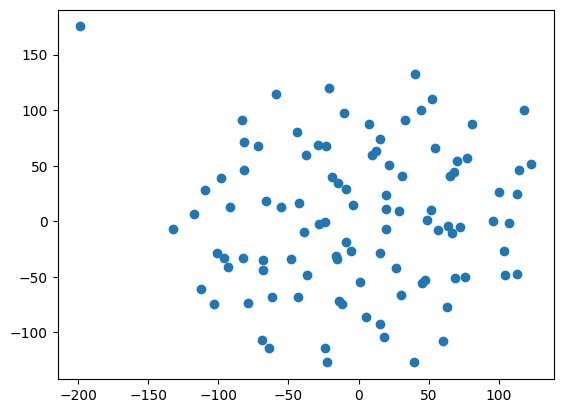

In [47]:
# visualize vectors
def visualize_vectors(vectors):
    print("Visualizing vectors...")
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.manifold import TSNE

    # convert to numpy array
    vectors = np.array(vectors)

    # cut to 100
    vectors = vectors[:100]
    # reduce dimensionality
    tsne = TSNE(n_components=3, random_state=0)
    vectors_2d = tsne.fit_transform(vectors)

    # categorize by genre
    
    # plot
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
    plt.show()

# todo: visualize query


visualize_vectors(vectors)